### 선형 회귀 linear regression(최소 제곱법 OLS, ardinary least squares)
- 예측과 훈련 세트에 있는 타깃 y 사이의 평균제곱오차를 최소화 하는 파라미터를 찾음
- 평균제곱오차(mse, mean squared error) : 예측값과 타깃 값의 차이를 제곱하여 더한 후에 샘플의 개수로 나눈 것
- 선형회귀는 매개변수가 없는 것이 장점, 그래서 모델의 복잡도를 제어할 방법도 없음

In [4]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import mglearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

wave 데이터셋

In [5]:
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

lr = LinearRegression().fit(X_train, y_train)

In [6]:
print("lr.coef_:", lr.coef_)             # 기울기 파라미터(w) : 가중치 or 계수
print("lr.intercept_:", lr.intercept_)   # 파라미터(b) : 편향 or 절편

lr.coef_: [0.39390555]
lr.intercept_: -0.031804343026759746


In [7]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))     # 과소 적합
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.67
테스트 세트 점수: 0.66


보스턴 주택가격 데이터셋

In [8]:
X, y = mglearn.datasets.load_extended_boston()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

In [10]:
print("훈련 세트 점수: {:.2f}".format(lr.score(X_train, y_train)))     # 훈련 데이터와 테스트 데이터 사이의 성능차이는 모델이 과대적합되었기 때문
print("테스트 세트 점수: {:.2f}".format(lr.score(X_test, y_test)))

훈련 세트 점수: 0.95
테스트 세트 점수: 0.61


### 리지 회귀(Ridge)
- 모든 특성이 출력에 주는 영향을 최소한으로 만든다.(기울기를 작게 만는다)
- 규제: 과대적합이 되지 않도록 모델을 강제로 제한하는 것(리지 회귀에 사용하는 규제방식은 L2규제)

In [12]:
from sklearn.linear_model import Ridge

ridge = Ridge().fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge.score(X_test, y_test)))

훈련 세트 점수: 0.89
테스트 세트 점수: 0.75


- Ridge는 모델을 단순화(계수를 0에 가깝게) 해주고 훈련 세트에 대한 성능 사이를 절충할 수 있는 방법을 제공
- alpha 매개변수로 훈련세트의 성능 대비 모델을 얼마나 단순화할지 지정할 수 있음

In [15]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge10.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge10.score(X_test, y_test)))

훈련 세트 점수: 0.79
테스트 세트 점수: 0.64


In [16]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("훈련 세트 점수: {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수: {:.2f}".format(ridge01.score(X_test, y_test)))

훈련 세트 점수: 0.93
테스트 세트 점수: 0.77


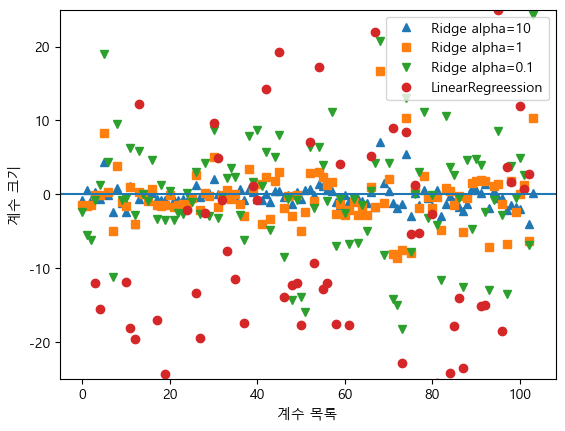

In [19]:
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")

plt.plot(lr.coef_, 'o', label="LinearRegreession")
plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.ylim(-25, 25)
plt.legend()


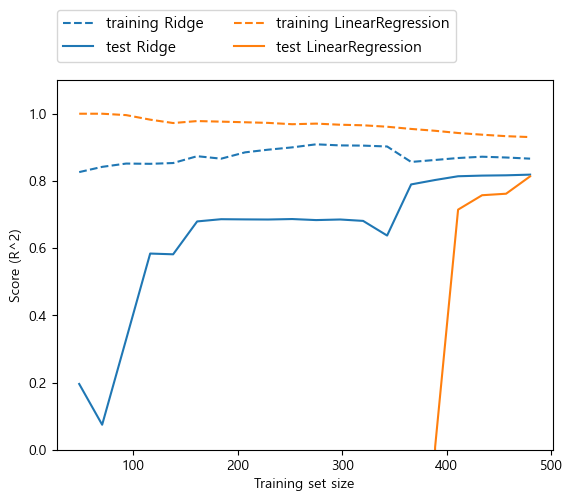

In [21]:
# 학습 곡선 : 데이터셋 크기에 따른 모데르인 선은변화를 나타낸 그래프
mglearn.plots.plot_ridge_n_samples()